In [1]:
import pandas as pd
plays_processed = pd.read_csv('/home/pshmo/summer_milestone_2-1/datasets/nfl-big-data-bowl-2023/plays_processed.csv') #when used on the other machine
#plays_processed = pd.read_csv('/Users/petershmorhun/Documents/GitHub/summer_milestone_2/datasets/nfl-big-data-bowl-2023/plays_processed.csv')
plays_processed.head()

,quarter,down,possessionTeam_ATL,possessionTeam_BAL,possessionTeam_BUF,possessionTeam_CAR,possessionTeam_CHI,possessionTeam_CIN,possessionTeam_CLE,possessionTeam_DAL,...,DL_defensecount,LB_defensecount,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_backFieldBlock
0,1,3,0,0,0,0,0,0,0,0,...,4,2,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0
1,1,1,0,0,0,0,0,0,0,1,...,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,0,0,0,0,0,0,0,1,...,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,0,0,0,0,0,0,1,...,4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,0,0,0,0,0,0,0,1,...,3,4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [2]:
# 12. Final DataFrame ready for modeling
df_final = plays_processed.copy()
# Fill NaN values with 0
df_final = df_final.fillna(0)
df_final.head()

,quarter,down,possessionTeam_ATL,possessionTeam_BAL,possessionTeam_BUF,possessionTeam_CAR,possessionTeam_CHI,possessionTeam_CIN,possessionTeam_CLE,possessionTeam_DAL,...,DL_defensecount,LB_defensecount,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_backFieldBlock
0,1,3,0,0,0,0,0,0,0,0,...,4,2,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0
1,1,1,0,0,0,0,0,0,0,1,...,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,0,0,0,0,0,0,0,1,...,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,0,0,0,0,0,0,1,...,4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,0,0,0,0,0,0,0,1,...,3,4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [3]:
len(df_final)

8522

In [4]:
from sklearn.model_selection import train_test_split

# Create holdout set before any outlier removal

# First split: separate holdout set (10% of data)
df_temp, df_holdout = train_test_split(df_final, test_size=0.1, random_state=42)

print(f"Original dataset size: {len(df_final)}")
print(f"Holdout set size: {len(df_holdout)}")
print(f"Remaining data for train/test: {len(df_temp)}")

# Show holdout set distribution
print(f"\nHoldout set playResult distribution:")
print(df_holdout['playResult'].value_counts().sort_index())

Original dataset size: 8522
Holdout set size: 853
Remaining data for train/test: 7669

Holdout set playResult distribution:
playResult
-16      1
-14      2
-13      1
-12      2
-11      3
-10     21
-9       9
-8       5
-7       8
-6       6
-5       6
-4       4
-3       1
-2       5
-1       4
 0     282
 1       7
 2      25
 3      16
 4      38
 5      38
 6      30
 7      36
 8      29
 9      22
 10     20
 11     27
 12     19
 13     17
 14     23
 15     11
 16     17
 17     10
 18     10
 19      5
 20     10
 21      6
 22     12
 23      9
 24      9
 25      6
 26      6
 27      2
 28      6
 29      6
 30      2
 32      1
 33      2
 34      1
 35      3
 37      3
 38      1
 39      1
 40      1
 41      1
 44      1
 49      1
 51      1
 56      1
 61      1
Name: count, dtype: int64


## remove outliers on test set

In [5]:
import numpy as np

# Calculate IQR of playResult
Q1 = df_final['playResult'].quantile(0.25)
Q3 = df_final['playResult'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out extreme outliers
df_no_outliers = df_temp[(df_temp['playResult'] >= lower_bound) & (df_temp['playResult'] <= upper_bound)].copy()

# Print info about the filtering
print(f"Original dataset size: {len(df_final)}")
print(f"After removing outliers: {len(df_no_outliers)}")
print(f"Removed {len(df_final) - len(df_no_outliers)} outliers")
print(f"IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Prepare data for modeling
y_no_outliers = df_no_outliers['playResult']
X_no_outliers = df_no_outliers.drop(columns=['playResult'])

Original dataset size: 8522
After removing outliers: 7329
Removed 1193 outliers
IQR bounds: [-16.50, 27.50]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42, stratify=y_no_outliers)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
X_holdout, y_holdout = df_holdout.drop(columns=['playResult']), df_holdout['playResult']
X_holdout.to_csv('X_holdout.csv', index=False)
y_holdout.to_csv('y_holdout.csv', index=False)

In [7]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def train_xgboost_regressor(X_train, X_test, y_train, y_test):
    """
    Train XGBoost regressor and evaluate performance
    """
    
    print("=== XGBoost Regressor Training ===")
    print(f"Training set: {X_train.shape}")
    print(f"Test set: {X_test.shape}")
    print(f"Target statistics:")
    print(f"  Train - Mean: {np.mean(y_train):.4f}, Std: {np.std(y_train):.4f}")
    print(f"  Test - Mean: {np.mean(y_test):.4f}, Std: {np.std(y_test):.4f}")
    
    # XGBoost parameters for regression
    base_params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'max_depth': 4,
        'learning_rate': 0.1,
        'n_estimators': 500,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'reg_alpha': 0.1,
        'reg_lambda': 0.1,
        'random_state': 42,
        'device': 'cuda',      # GPU acceleration
        'tree_method': 'hist', # Required for GPU
        'n_jobs': 1           # Use 1 job when using GPU
    }
    
    # Create model for cross-validation (without early stopping)
    cv_model = xgb.XGBRegressor(**base_params)
    
    print("\n=== Cross-Validation ===")
    # 5-fold cross-validation
    cv_scores = cross_val_score(cv_model, X_train, y_train, cv=5, scoring='r2')
    print(f"Cross-validation R² scores: {cv_scores}")
    print(f"Mean CV R²: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")
    
    # Create final model with early stopping
    final_params = {**base_params, 'early_stopping_rounds': 50}
    model = xgb.XGBRegressor(**final_params)
    
    # Train final model
    print("\n=== Training Final Model ===")
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False
    )
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    print("\n=== EVALUATION METRICS ===")
    
    # Training metrics
    train_r2 = r2_score(y_train, y_pred_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    
    print("Training Set:")
    print(f"  R²: {train_r2:.4f}")
    print(f"  RMSE: {train_rmse:.4f}")
    print(f"  MAE: {train_mae:.4f}")
    
    # Test metrics
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    print("\nTest Set:")
    print(f"  R²: {test_r2:.4f}")
    print(f"  RMSE: {test_rmse:.4f}")
    print(f"  MAE: {test_mae:.4f}")
    
    # Feature importance
    print("\n=== TOP 10 FEATURE IMPORTANCES ===")
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns
    else:
        feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]
    
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(feature_importance.head(10))
    
    # Residual analysis
    print("\n=== RESIDUAL ANALYSIS ===")
    residuals = y_test - y_pred_test
    print(f"Residual statistics:")
    print(f"  Mean: {np.mean(residuals):.6f}")
    print(f"  Std: {np.std(residuals):.4f}")
    print(f"  Min: {np.min(residuals):.4f}")
    print(f"  Max: {np.max(residuals):.4f}")
    
    # Baseline comparison
    baseline_r2 = 0  # Always predicting mean
    print(f"\n=== BASELINE COMPARISON ===")
    print(f"Baseline R² (predicting mean): {baseline_r2:.4f}")
    print(f"Model improvement over baseline: {test_r2 - baseline_r2:.4f}")
    
    # Check for overfitting
    r2_diff = train_r2 - test_r2
    print(f"\n=== OVERFITTING CHECK ===")
    print(f"Training R² - Test R²: {r2_diff:.4f}")
    if r2_diff > 0.1:
        print("WARNING: Significant overfitting detected!")
    elif r2_diff > 0.05:
        print("CAUTION: Some overfitting present")
    else:
        print("Good generalization - minimal overfitting")
    
    return model, {
        'cv_scores': cv_scores,
        'train_r2': train_r2,
        'train_rmse': train_rmse,
        'train_mae': train_mae,
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'feature_importance': feature_importance,
        'residuals': residuals,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test
    }

def plot_predictions(y_true, y_pred, title="Predictions vs Actual"):
    """Plot predictions vs actual values"""
    plt.figure(figsize=(10, 8))
    
    # Scatter plot
    plt.subplot(2, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{title} - Scatter Plot')
    
    # Residuals plot
    plt.subplot(2, 2, 2)
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted')
    
    # Histogram of residuals
    plt.subplot(2, 2, 3)
    plt.hist(residuals, bins=30, alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    
    # Q-Q plot (approximate)
    plt.subplot(2, 2, 4)
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Residuals')
    
    plt.tight_layout()
    plt.show()

# Usage:
# model, results = train_xgboost_regressor(X_train, X_test, y_train, y_test)
# plot_predictions(results['y_test'], results['y_pred_test'], "Test Set")

print("Script ready! Run: model, results = train_xgboost_regressor(X_train, X_test, y_train, y_test)")

Script ready! Run: model, results = train_xgboost_regressor(X_train, X_test, y_train, y_test)


In [8]:
X_train.head()

,quarter,down,possessionTeam_ATL,possessionTeam_BAL,possessionTeam_BUF,possessionTeam_CAR,possessionTeam_CHI,possessionTeam_CIN,possessionTeam_CLE,possessionTeam_DAL,...,DL_defensecount,LB_defensecount,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_backFieldBlock
8392,2,1,0,0,0,0,0,0,0,1,...,4,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3173,4,1,0,0,0,0,0,0,0,0,...,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2386,1,2,0,0,0,0,0,0,1,0,...,3,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52,3,1,0,0,0,0,0,0,0,1,...,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
729,2,1,0,0,0,0,0,0,0,0,...,4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


=== XGBoost Regressor Training ===
Training set: (5863, 120)
Test set: (1466, 120)
Target statistics:
  Train - Mean: 5.1764, Std: 7.7118
  Test - Mean: 5.2074, Std: 7.6894

=== Cross-Validation ===


/home/pshmo/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:23:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738899731441/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Cross-validation R² scores: [0.83017212 0.85821044 0.74447358 0.86845165 0.82073724]
Mean CV R²: 0.8244 (+/- 0.0873)

=== Training Final Model ===

=== EVALUATION METRICS ===
Training Set:
  R²: 0.9434
  RMSE: 1.8343
  MAE: 0.8286

Test Set:
  R²: 0.8212
  RMSE: 3.2510
  MAE: 1.3531

=== TOP 10 FEATURE IMPORTANCES ===
                      feature  importance
99       prePenaltyPlayResult    0.337475
102            pff_playAction    0.032604
76      dropBackType_SCRAMBLE    0.026896
71   offenseFormation_SHOTGUN    0.023803
67               passResult_S    0.018376
63          defensiveTeam_WAS    0.015733
79   dropBackType_TRADITIONAL    0.013752
58          defensiveTeam_PIT    0.013165
64               passResult_I    0.012642
46          defensiveTeam_JAX    0.011477

=== RESIDUAL ANALYSIS ===
Residual statistics:
  Mean: 0.126537
  Std: 3.2486
  Min: -22.7024
  Max: 25.8147

=== BASELINE COMPARISON ===
Baseline R² (predicting mean): 0.0000
Model improvement over baseline: 0.8212



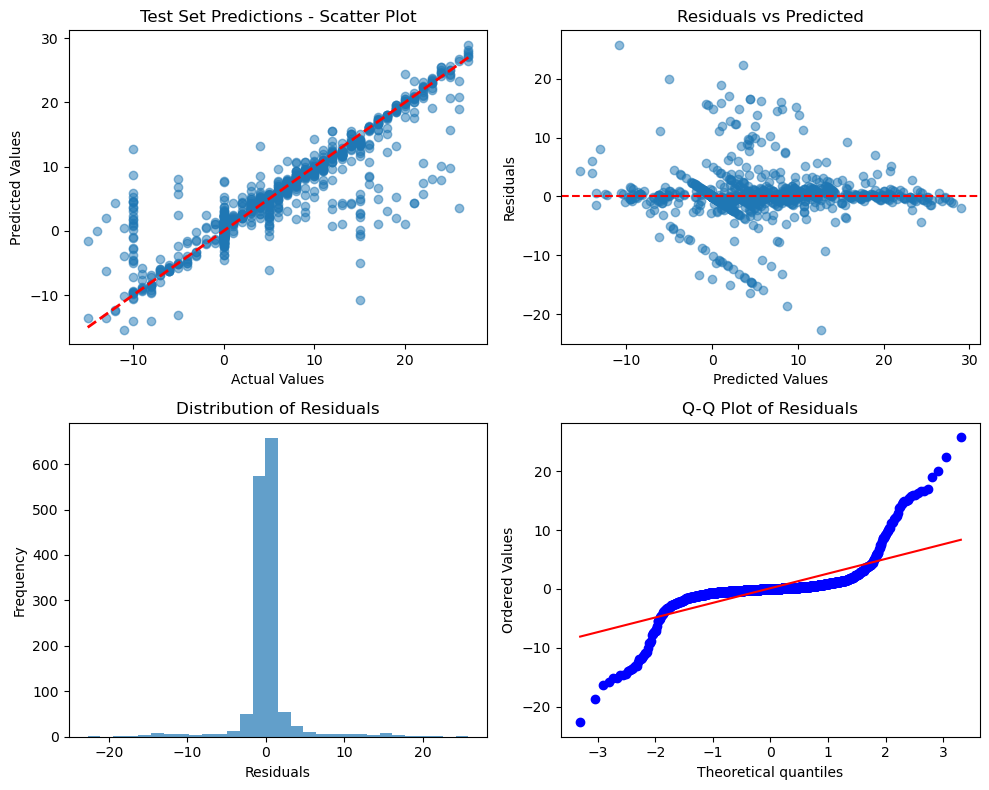

Final Test R²: 0.8212
Feature importance shape: (120, 2)


In [9]:
# Run the regressor
model, results = train_xgboost_regressor(X_train, X_test, y_train, y_test)

# Plot results
plot_predictions(y_test, results['y_pred_test'], "Test Set Predictions")

# Access results
print(f"Final Test R²: {results['test_r2']:.4f}")
print(f"Feature importance shape: {results['feature_importance'].shape}")